In [1]:
from scipy.stats import poisson, skellam
import statsmodels.api as sm
import statsmodels.formula.api as smf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/drive/MyDrive/match_score_prediction/matches_filtered.csv')

In [3]:
df = df[['home_team','away_team','home_goals','away_goals']]
df

,home_team,away_team,home_goals,away_goals
0,Brentford,Arsenal,2,0
1,Manchester United,Leeds United,5,1
2,Burnley,Brighton & Hove Albion,1,2
3,Chelsea,Crystal Palace,3,0
4,Everton,Southampton,3,1
...,...,...,...,...
1242,Southampton,Ipswich Town,1,1
1243,Tottenham Hotspur,Brentford,3,1
1244,Crystal Palace,Manchester United,0,0
1245,Brighton & Hove Albion,Nottingham Forest,2,2


In [4]:
df['home_goals'].value_counts()


,count
home_goals,
1,370
0,314
2,288
3,162
4,71
5,28
6,10
7,3
9,1


In [5]:
df['away_goals'].value_counts()

,count
away_goals,
1,403
0,398
2,252
3,121
4,52
5,15
6,5
8,1


In [6]:
df['home_team'].unique()

array(['Brentford', 'Manchester United', 'Burnley', 'Chelsea', 'Everton',
       'Leicester City', 'Watford', 'Norwich City', 'Newcastle United',
       'Tottenham Hotspur', 'Liverpool', 'Aston Villa', 'Crystal Palace',
       'Leeds United', 'Manchester City', 'Brighton & Hove Albion',
       'Southampton', 'Wolverhampton', 'Arsenal', 'West Ham United',
       'Fulham', 'Bournemouth', 'Nottingham Forest', 'Sheffield United',
       'Luton Town', 'Ipswich Town'], dtype=object)

In [7]:
# Convertir les données des équipes à domicile
home_goals_df = df[['home_team', 'away_team', 'home_goals']].assign(home=1).rename(
    columns={'home_team': 'team', 'away_team': 'opponent', 'home_goals': 'goals'})

# Convertir les données des équipes à l'extérieur
away_goals_df = df[['away_team', 'home_team', 'away_goals']].assign(home=0).rename(
    columns={'away_team': 'team', 'home_team': 'opponent', 'away_goals': 'goals'})

# Combiner les deux DataFrames
goal_model_data = pd.concat([home_goals_df, away_goals_df], ignore_index=True)

# Afficher le DataFrame résultant
print(goal_model_data)

                   team                opponent  goals  home
0             Brentford                 Arsenal      2     1
1     Manchester United            Leeds United      5     1
2               Burnley  Brighton & Hove Albion      1     1
3               Chelsea          Crystal Palace      3     1
4               Everton             Southampton      3     1
...                 ...                     ...    ...   ...
2489       Ipswich Town             Southampton      1     0
2490          Brentford       Tottenham Hotspur      1     0
2491  Manchester United          Crystal Palace      0     0
2492  Nottingham Forest  Brighton & Hove Albion      2     0
2493            Arsenal         Manchester City      2     0

[2494 rows x 4 columns]


In [8]:
goal_model_data[1245:]

,team,opponent,goals,home
1245,Brighton & Hove Albion,Nottingham Forest,2,1
1246,Manchester City,Arsenal,2,1
1247,Arsenal,Brentford,0,0
1248,Leeds United,Manchester United,1,0
1249,Brighton & Hove Albion,Burnley,2,0
...,...,...,...,...
2489,Ipswich Town,Southampton,1,0
2490,Brentford,Tottenham Hotspur,1,0
2491,Manchester United,Crystal Palace,0,0
2492,Nottingham Forest,Brighton & Hove Albion,2,0


This Poisson regression model is used to predict the number of goals scored (goals) based on three explanatory variables: whether the team is playing at home (home), the team itself (team), and the opponent (opponent). The model assumes that the number of goals follows a Poisson distribution, where the mean number of goals is modeled as an exponential function of the explanatory variables. The mathematical equation of the model is:

log
⁡
(
𝜆
)
=
𝛽
0
+
𝛽
1
⋅
home
+
𝛽
2
⋅
team
+
𝛽
3
⋅
opponent

λ is the average number of goals scored.

In [9]:
poisson_model = smf.glm(
    formula = 'goals ~ home + team + opponent',
    data=goal_model_data,
    family=sm.families.Poisson()).fit()

poisson_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  goals   No. Observations:                 2494
Model:                            GLM   Df Residuals:                     2442
Model Family:                 Poisson   Df Model:                           51
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3670.1
Date:                Thu, 26 Sep 2024   Deviance:                       2910.5
Time:                        23:21:58   Pearson chi2:                 2.53e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1862
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                              0.2341      0.113      2.066      0.039       0.012       0.456
team[T.Aston Villa]                   -0.2604      0.097     -2.691      0.007      -0.450      -0.071
team[T.Bournemouth]                   -0.5111      0.120     -4.244      0.000      -0.747      -0.275
team[T.Brentford]                     -0.3738      0.100     -3.741      0.000      -0.570      -0.178
team[T.Brighton & Hove Albion]        -0.3513      0.099     -3.562      0.000      -0.545      -0.158
team[T.Burnley]                       -0.8124      0.132     -6.155      0.000      -1.071      -0.554
team[T.Chelsea]                       -0.2091      0.095     -2.202      0.028      -0.395      -0.023
team[T.Crystal Palace]                -0.4933      0.103     -4.772      0.000      -0.696      -0.291
team[T.Everton]                       -0.7202      0.111     -6.502      0.000      -0.937      -0.503
team[T.Fulham]                        -0.3492      0.112     -3.105      0.002      -0.570      -0.129
team[T.Ipswich Town]                  -1.0364      0.582     -1.781      0.075      -2.177       0.104
team[T.Leeds United]                  -0.5503      0.123     -4.463      0.000      -0.792      -0.309
team[T.Leicester City]                -0.3863      0.112     -3.456      0.001      -0.605      -0.167
team[T.Liverpool]                      0.0376      0.089      0.424      0.672      -0.136       0.211
team[T.Luton Town]                    -0.3656      0.153     -2.390      0.017      -0.665      -0.066
team[T.Manchester City]                0.1857      0.086      2.161      0.031       0.017       0.354
team[T.Manchester United]             -0.3534      0.099     -3.586      0.000      -0.547      -0.160
team[T.Newcastle United]              -0.2048      0.095     -2.164      0.030      -0.390      -0.019
team[T.Norwich City]                  -1.2191      0.218     -5.586      0.000      -1.647      -0.791
team[T.Nottingham Forest]             -0.5538      0.122     -4.546      0.000      -0.793      -0.315
team[T.Sheffield United]              -0.7445      0.181     -4.115      0.000      -1.099      -0.390
team[T.Southampton]                   -0.7182      0.128     -5.598      0.000      -0.970      -0.467
team[T.Tottenham Hotspur]             -0.0980      0.093     -1.058      0.290      -0.280       0.084
team[T.Watford]                       -0.9123      0.183     -4.979      0.000      -1.271      -0.553
team[T.West Ham United]               -0.3652      0.100     -3.642      0.000      -0.562      -0.169
team[T.Wolverhampton]                 -0.6696      0.110     -6.077      0.000      -0.886      -0.454
opponent[T.Aston Villa]                0.3185      0.119      2.679      0.007       0.085      

In [12]:
home_team = 'Arsenal'
away_team = 'Manchester City'

In [14]:
# Créer des DataFrames avec les valeurs réelles des équipes
home_score_rate = poisson_model.predict(
    pd.DataFrame(data={'team': [home_team], 'opponent': [away_team], 'home': [1]}, index=[1])
)

away_score_rate = poisson_model.predict(
    pd.DataFrame(data={'team': [away_team], 'opponent': [home_team], 'home': [0]}, index=[1])
)

# Afficher les taux de score prédits
print("Home score rate:", home_score_rate)
print("Away score rate:", away_score_rate)


Home score rate: 1    1.262498
dtype: float64
Away score rate: 1    1.521602
dtype: float64


In [15]:
print(home_team + ' VS ' + away_team + ' expect to score: ' + str(home_score_rate))

print(away_team + ' VS ' + home_team + ' expect to score: ' + str(away_score_rate))

Arsenal VS Manchester City expect to score: 1    1.262498
dtype: float64
Manchester City VS Arsenal expect to score: 1    1.521602
dtype: float64


In [16]:
# Fonction pour simuler un match et calculer les buts
def simulate_match(foot_model, homeTeam, awayTeam, max_goals=10):

    # Prédire les taux de buts pour l'équipe à domicile et l'équipe à l'extérieur
    home_goals_avg = foot_model.predict(pd.DataFrame(data={'team': [homeTeam], 'opponent': [awayTeam], 'home': [1]}, index=[1])).values[0]
    away_goals_avg = foot_model.predict(pd.DataFrame(data={'team': [awayTeam], 'opponent': [homeTeam], 'home': [0]}, index=[1])).values[0]

    # Calculer les probabilités de Poisson pour chaque nombre de buts
    team_pred = [[poisson.pmf(i, team_avg) for i in range(0, max_goals + 1)] for team_avg in [home_goals_avg, away_goals_avg]]

    # Calculer la matrice de probabilité des scores
    return np.outer(np.array(team_pred[0]), np.array(team_pred[1]))

In [17]:
max_goals=5

score_matrix = simulate_match(poisson_model, home_team, away_team, max_goals)
score_matrix

array([[6.17846628e-02, 9.40116845e-02, 7.15241973e-02, 3.62771275e-02,
        1.37998401e-02, 4.19957366e-03],
       [7.80030026e-02, 1.18689548e-01, 9.02991437e-02, 4.57997947e-02,
        1.74222681e-02, 5.30195262e-03],
       [4.92393107e-02, 7.49226480e-02, 5.70012365e-02, 2.89110707e-02,
        1.09977878e-02, 3.34685184e-03],
       [2.07215076e-02, 3.15298935e-02, 2.39879791e-02, 1.21667213e-02,
        4.62822776e-03, 1.40846439e-03],
       [6.54021460e-03, 9.95160552e-03, 7.57119288e-03, 3.84011481e-03,
        1.46078187e-03, 4.44545809e-04],
       [1.65140135e-03, 2.51277607e-03, 1.91172291e-03, 9.69627322e-04,
        3.68846789e-04, 1.12247624e-04]])

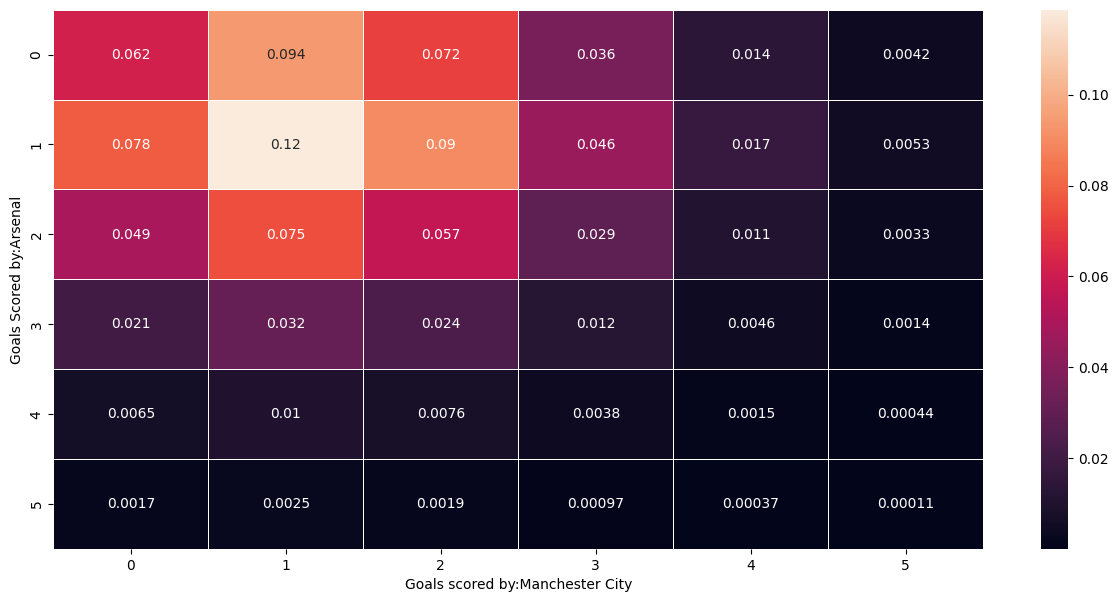

In [18]:
import seaborn as sns

plt.figure(figsize=(15,7))
ax = sns.heatmap(score_matrix, linewidth=0.7, annot=True)
ax.set_xlabel('Goals scored by:' + away_team)
ax.set_ylabel('Goals Scored by:' + home_team)

plt.show()

In [20]:
homewin = np.sum(np.tril(score_matrix, -1))
draw = np.sum(np.diag(score_matrix))
awaywin = np.sum(np.triu(score_matrix, 1))



print(home_team + ' win probability: ' + str(round(homewin*100, 2)) + ' %')
print('Draw Probability: ' + str(round(draw*100, 2)) + '%')
print(away_team + ' win probability: ' + str(round(awaywin*100, 2)) + ' %')

print('**************************************')

print(round(homewin, 5), round(draw, 5), round(awaywin, 5))

Arsenal win probability: 31.37 %
Draw Probability: 25.12%
Manchester City win probability: 42.84 %
**************************************
0.31372 0.25122 0.42837


# predit the next matches in PL

In [21]:
df_matches = pd.read_csv('/content/drive/MyDrive/match_score_prediction/matches_to_predites.csv')
df_matches

,home_team,away_team
0,Crystal Palace,Liverpool
1,Arsenal,Southampton
2,Brentford,Wolverhampton
3,Leicester City,Bournemouth
4,Manchester City,Fulham
...,...,...
315,Newcastle United,Everton
316,Nottingham Forest,Chelsea
317,Southampton,Arsenal
318,Tottenham Hotspur,Brighton & Hove Albion


In [22]:
# Créer un DataFrame pour les nouveaux matchs
new_matches = {
    'home_team': [
        'Newcastle United', 'Arsenal', 'Brentford', 'Chelsea',
        'Everton', 'Nottingham Forest', 'Wolverhampton', 'Ipswich Town',
        'Manchester United', 'Bournemouth'
    ],
    'away_team': [
        'Manchester City', 'Leicester City', 'West Ham United', 'Brighton & Hove Albion',
        'Crystal Palace', 'Fulham', 'Liverpool', 'Aston Villa',
        'Tottenham Hotspur', 'Southampton'
    ]
}
new_matches_df = pd.DataFrame(new_matches)

# Concaténer les deux DataFrames
combined_df = pd.concat([new_matches_df, df_matches], ignore_index=True)

# Afficher le DataFrame résultant
print(combined_df)

             home_team               away_team
0     Newcastle United         Manchester City
1              Arsenal          Leicester City
2            Brentford         West Ham United
3              Chelsea  Brighton & Hove Albion
4              Everton          Crystal Palace
..                 ...                     ...
325   Newcastle United                 Everton
326  Nottingham Forest                 Chelsea
327        Southampton                 Arsenal
328  Tottenham Hotspur  Brighton & Hove Albion
329      Wolverhampton               Brentford

[330 rows x 2 columns]


In [23]:
# Fonction pour simuler un match et calculer les résultats
def simulate_match(foot_model, homeTeam, awayTeam, max_goals=10):
    # Prédire les taux de buts
    home_goals_avg = foot_model.predict(pd.DataFrame(data={'team': [homeTeam], 'opponent': [awayTeam], 'home': [1]})).values[0]
    away_goals_avg = foot_model.predict(pd.DataFrame(data={'team': [awayTeam], 'opponent': [homeTeam], 'home': [0]})).values[0]

    # Calculer les probabilités de Poisson pour chaque nombre de buts
    team_pred = [[poisson.pmf(i, team_avg) for i in range(0, max_goals + 1)] for team_avg in [home_goals_avg, away_goals_avg]]

    # Calculer la matrice de probabilité des scores
    score_matrix = np.outer(np.array(team_pred[0]), np.array(team_pred[1]))

    # Probabilités de victoire
    homewin = np.sum(np.tril(score_matrix, -1))
    draw = np.sum(np.diag(score_matrix))
    awaywin = np.sum(np.tril(score_matrix, 1))

    return home_goals_avg, away_goals_avg, homewin, draw, awaywin


# Appliquer la fonction de simulation à chaque ligne de combined_df
results = combined_df.apply(lambda row: simulate_match(poisson_model, row['home_team'], row['away_team']), axis=1)

# Extraire les résultats dans des colonnes séparées
combined_df[['home_goals', 'away_goals', 'home_win_prob', 'draw_prob', 'away_win_prob']] = pd.DataFrame(results.tolist(), index=combined_df.index)

# Afficher le DataFrame final avec les résultats ajoutés
print(combined_df)


             home_team               away_team  home_goals  away_goals  \
0     Newcastle United         Manchester City    1.028656    2.016230   
1              Arsenal          Leicester City    2.371401    0.858802   
2            Brentford         West Ham United    1.629020    1.234674   
3              Chelsea  Brighton & Hove Albion    1.592864    1.053413   
4              Everton          Crystal Palace    0.964118    1.135526   
..                 ...                     ...         ...         ...   
325   Newcastle United                 Everton    1.849807    0.814944   
326  Nottingham Forest                 Chelsea    1.050348    1.698418   
327        Southampton                 Arsenal    0.752398    2.220706   
328  Tottenham Hotspur  Brighton & Hove Albion    1.780089    1.216358   
329      Wolverhampton               Brentford    1.111779    1.234973   

     home_win_prob  draw_prob  away_win_prob  
0         0.186694   0.210978       0.634187  
1         0.71005

In [24]:
combined_df[combined_df['home_team'] == 'Manchester City']

,home_team,away_team,home_goals,away_goals,home_win_prob,draw_prob,away_win_prob
14,Manchester City,Fulham,2.584704,0.729309,0.772531,0.144866,0.978134
34,Manchester City,Southampton,3.264334,0.504267,0.889535,0.079896,0.993672
66,Manchester City,Tottenham Hotspur,2.540591,0.937554,0.720682,0.161648,0.962478
87,Manchester City,Nottingham Forest,3.077316,0.594359,0.858168,0.098079,0.990108
105,Manchester City,Manchester United,2.375148,0.726241,0.741010,0.163204,0.974435
125,Manchester City,Everton,2.733487,0.503240,0.838958,0.115030,0.990863
146,Manchester City,West Ham United,2.850304,0.717712,0.810331,0.123081,0.982768
176,Manchester City,Chelsea,2.200250,0.838944,0.684066,0.186426,0.961054
196,Manchester City,Newcastle United,2.461577,0.842552,0.728777,0.162798,0.967841
207,Manchester City,Liverpool,1.742614,1.073660,0.530404,0.236382,0.913063


In [25]:
# Créer les données pour le classement des équipes
data = {
    'Team': [
        # Initialiser le DataFrame du classement avec les équipes et leurs points
      'Manchester City','Liverpool','Aston Villa','Arsenal','Chelsea',
        'Newcastle United','Brighton & Hove Albion','Nottingham Forest',
        'Fulham','Tottenham Hotspur', 'Manchester United','Brentford',
        'Bournemouth', 'West Ham United', 'Leicester City','Crystal Palace',
    'Ipswich Town', 'Southampton', 'Everton', 'Wolverhampton',
     ],
    'Play': [5] * 20,  # Matchs joués
    'Win': [4, 4, 4, 3, 3, 3, 2, 2, 2, 2, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0],  # Victoires
    'Draw': [1, 0, 0, 2, 1, 1, 3, 3, 2, 1, 1, 0, 2, 1, 3, 3, 3, 1, 1, 1],  # Nuls
    'Lose': [0, 1, 1, 0, 1, 1, 0, 0, 1, 2, 2, 3, 2, 3, 2, 2, 2, 4, 4, 4],  # Défaites
    'Goals_scored': [
        '13', '10', '10', '8', '11',
        '7', '8', '6', '7', '9',
        '5', '7', '5', '5', '6',
        '4', '3', '2', '5', '5'
    ],
    'Goals_conceded': [
        '5', '1', '7', '3', '5',
        '6', '4', '4', '5', '5',
        '5', '9', '8', '9', '8',
        '7', '8', '9', '14', '14'
    ],
    'Points': [
        13, 12, 12, 11, 10,
        10, 9, 9, 8, 7,
        7, 6, 5, 4, 3,
        3, 3, 1, 1, 1
    ],  # Points
    'LAST 5 ': [
        'V V V V N', 'V V V D V', 'V D V V V',
        'V V N V N', 'D V N V V', 'V N V V D',
        'V V N N N', 'N V N V N', 'D V N N V',
        'N V D D V', 'V D D V N', 'V D V D D',
        'N N V D D', 'D V D N D', 'N D D N N',
        'D D N N N', 'D D D D N', 'D D N N N',
        'D D D D N', 'D D N D D'
    ]  # Derniers résultats
}

# Créer le DataFrame
df_classement = pd.DataFrame(data)

# Trier le DataFrame par points et par nombre de victoires
df_classement = df_classement.sort_values(by=['Points', 'Win'], ascending=False).reset_index(drop=True)

# Afficher le DataFrame
print(df_classement)


                      Team  Play  Win  Draw  Lose Goals_scored Goals_conceded  \
0          Manchester City     5    4     1     0           13              5   
1                Liverpool     5    4     0     1           10              1   
2              Aston Villa     5    4     0     1           10              7   
3                  Arsenal     5    3     2     0            8              3   
4                  Chelsea     5    3     1     1           11              5   
5         Newcastle United     5    3     1     1            7              6   
6   Brighton & Hove Albion     5    2     3     0            8              4   
7        Nottingham Forest     5    2     3     0            6              4   
8                   Fulham     5    2     2     1            7              5   
9        Tottenham Hotspur     5    2     1     2            9              5   
10       Manchester United     5    2     1     2            5              5   
11               Brentford  

In [26]:
# Assurer que les colonnes sont de type entier avant la mise à jour
for col in ['Play', 'Win', 'Draw', 'Lose', 'Goals_scored', 'Goals_conceded', 'Points']:
    df_classement[col] = df_classement[col].astype(int)

# Mise à jour des points et des statistiques en fonction des résultats
for index, row in combined_df.iterrows():
    home_goals = int(row['home_goals'])
    away_goals = int(row['away_goals'])

    home_team = row['home_team']
    away_team = row['away_team']

    # Mettre à jour le nombre de matchs joués
    df_classement.loc[df_classement['Team'] == home_team, 'Play'] += 1
    df_classement.loc[df_classement['Team'] == away_team, 'Play'] += 1

    # Mettre à jour les buts marqués et encaissés
    df_classement.loc[df_classement['Team'] == home_team, 'Goals_scored'] += home_goals
    df_classement.loc[df_classement['Team'] == home_team, 'Goals_conceded'] += away_goals
    df_classement.loc[df_classement['Team'] == away_team, 'Goals_scored'] += away_goals
    df_classement.loc[df_classement['Team'] == away_team, 'Goals_conceded'] += home_goals

    if home_goals > away_goals:
        df_classement.loc[df_classement['Team'] == home_team, 'Win'] += 1
        df_classement.loc[df_classement['Team'] == away_team, 'Lose'] += 1
        df_classement.loc[df_classement['Team'] == home_team, 'Points'] += 3  # Équipe à domicile gagne
    elif away_goals > home_goals:
        df_classement.loc[df_classement['Team'] == away_team, 'Win'] += 1
        df_classement.loc[df_classement['Team'] == home_team, 'Lose'] += 1
        df_classement.loc[df_classement['Team'] == away_team, 'Points'] += 3  # Équipe à l'extérieur gagne
    else:
        df_classement.loc[df_classement['Team'] == home_team, 'Draw'] += 1  # Match nul
        df_classement.loc[df_classement['Team'] == away_team, 'Draw'] += 1  # Match nul
        df_classement.loc[df_classement['Team'] == home_team, 'Points'] += 1
        df_classement.loc[df_classement['Team'] == away_team, 'Points'] += 1

# Trier le DataFrame par points (de manière décroissante)
df_classement = df_classement.sort_values(by='Points', ascending=False).reset_index(drop=True)

# Afficher le classement final
print(df_classement)

                      Team  Play  Win  Draw  Lose  Goals_scored  \
0          Manchester City    38   34     4     0            76   
1                Liverpool    38   27    10     1            61   
2                  Arsenal    38   24    14     0            56   
3                  Chelsea    38   12    23     3            45   
4         Newcastle United    38   11    22     5            40   
5        Tottenham Hotspur    38   11    21     6            47   
6        Manchester United    38   11    21     6            34   
7   Brighton & Hove Albion    38    9    26     3            38   
8              Aston Villa    38    9    24     5            41   
9           Crystal Palace    38    9    19    10            29   
10                  Fulham    38    6    27     5            36   
11               Brentford    38    6    26     6            37   
12         West Ham United    38    6    24     8            35   
13          Leicester City    38    4    26     8            3

In [27]:
df_classement.to_excel('/content/drive/MyDrive/match_score_prediction/Classment_finale_PL.xlsx', index=False)
combined_df.to_excel('/content/drive/MyDrive/match_score_prediction/Score_PL_predites.xlsx', index=False)

In [28]:
from prettytable import PrettyTable

# Créer une instance de PrettyTable
table = PrettyTable()

# Ajouter les colonnes
table.field_names = df_classement.columns.tolist()

# Ajouter les lignes
for index, row in df_classement.iterrows():
    table.add_row(row.tolist())

# Afficher le tableau
print(table)


+------------------------+------+-----+------+------+--------------+----------------+--------+-----------+
|          Team          | Play | Win | Draw | Lose | Goals_scored | Goals_conceded | Points |  LAST 5   |
+------------------------+------+-----+------+------+--------------+----------------+--------+-----------+
|    Manchester City     |  38  |  34 |  4   |  0   |      76      |       10       |  106   | V V V V N |
|       Liverpool        |  38  |  27 |  10  |  1   |      61      |       13       |   91   | V V V D V |
|        Arsenal         |  38  |  24 |  14  |  0   |      56      |       17       |   86   | V V N V N |
|        Chelsea         |  38  |  12 |  23  |  3   |      45      |       30       |   59   | D V N V V |
|    Newcastle United    |  38  |  11 |  22  |  5   |      40      |       36       |   55   | V N V V D |
|   Tottenham Hotspur    |  38  |  11 |  21  |  6   |      47      |       37       |   54   | N V D D V |
|   Manchester United    |  38  |  11